In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

%matplotlib inline

In [2]:
def read_graph(filename):
    edges = []
    with open(filename, "r") as fin:
        _ = fin.readline()
        _ = fin.readline()
        for edge in fin.readlines():
            v1, v2 = list(map(int, edge.strip().split()))
            edges.append((v1, v2))
    return np.array(edges)

In [3]:
graph_artist_to_label = read_graph("./dbpedia-recordlabel/out.dbpedia-recordlabel")

In [4]:
G_artist_to_label = nx.DiGraph()
G_labels = nx.Graph()

In [5]:
np.max(graph_artist_to_label, axis=0)

array([168337,  18421])

In [7]:
np.max(graph_artist_to_label[:1000, 0])

265

In [254]:
graph_artist_to_label.shape[0]

233286

In [58]:
c = 1000

In [59]:
graph2 = np.copy(graph_artist_to_label)
graph2[:, 1] += np.max(graph_artist_to_label[:c, 0])

In [60]:
graph_full = np.copy(graph_artist_to_label)
graph_full[:, 1] += np.max(graph_artist_to_label[:, 0])

In [61]:
G_artist_to_label = nx.DiGraph()
G = nx.Graph()
G_artist_to_label.add_nodes_from(graph2[:c, 0])

In [62]:
G_artist_to_label.add_nodes_from(graph2[:c, 1])

In [63]:
G_artist_to_label.add_edges_from(graph2[:c])


In [ ]:
G_artist_to_label.edges()

In [56]:
set(np.unique(graph2[:1000, 1])) & set(np.unique(graph2[:1000, 0]))

set()

In [66]:
len(set(np.unique(graph2[:1000, 1])))

400

In [67]:
len(set(np.unique(graph2[:1000, 0])))

265

In [109]:
nx.draw_networkx_nodes?

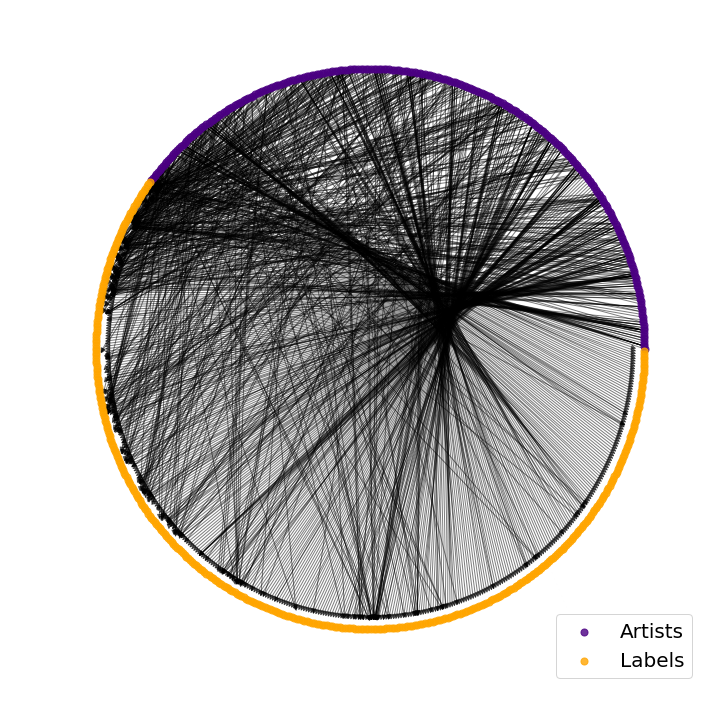

In [171]:
plt.figure(figsize=(10, 10))
pos = nx.shell_layout(G_artist_to_label)
nx.draw_networkx_nodes(G_artist_to_label, pos,
                       nodelist=list(np.unique(graph2[:c, 0])),
                       node_color='indigo',
                       node_size=50,
                       alpha=0.8,
                       label="Artists")
nx.draw_networkx_nodes(G_artist_to_label,pos,
                       nodelist=list(np.unique(graph2[:c, 1])),
                       node_color='orange',
                       node_size=50,
                       alpha=0.8,
                       label="Labels")
nx.draw_networkx_edges(G_artist_to_label ,pos,width=1.0, alpha=0.5, edge_color="black")
plt.axis("off")
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("tlen_1.png")
plt.show()
#nx.draw(G_artist_to_label, pos=nx.spectral_layout(G_artist_to_label))

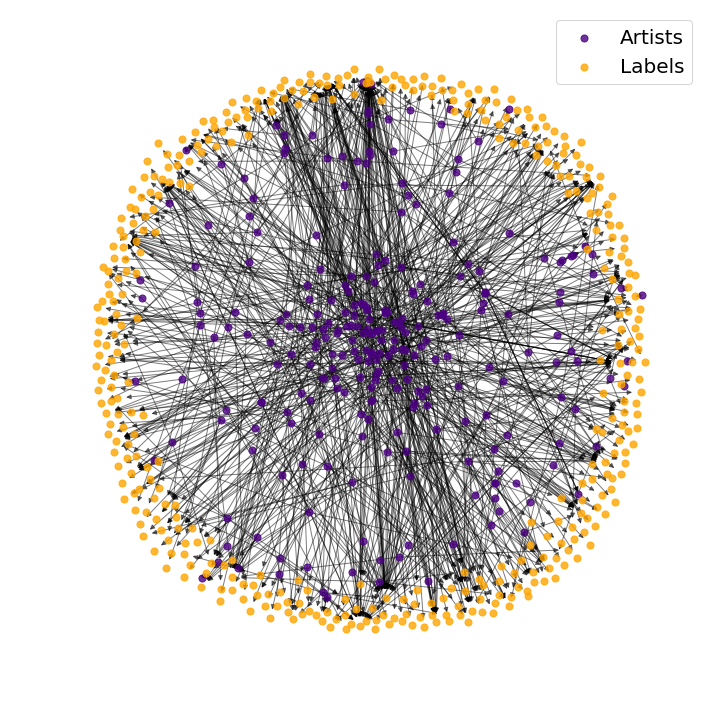

In [170]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_artist_to_label)
nx.draw_networkx_nodes(G_artist_to_label, pos,
                       nodelist=list(np.unique(graph2[:c, 0])),
                       node_color='indigo',
                       node_size=50,
                       alpha=0.8,
                       label="Artists")
nx.draw_networkx_nodes(G_artist_to_label,pos,
                       nodelist=list(np.unique(graph2[:c, 1])),
                       node_color='orange',
                       node_size=50,
                       alpha=0.8,
                       label="Labels")
nx.draw_networkx_edges(G_artist_to_label ,pos,width=1.0, alpha=0.5, edge_color="black")
plt.axis("off")
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("tlen_2.png")
plt.show()
#nx.draw(G_artist_to_label, pos=nx.spectral_layout(G_artist_to_label))

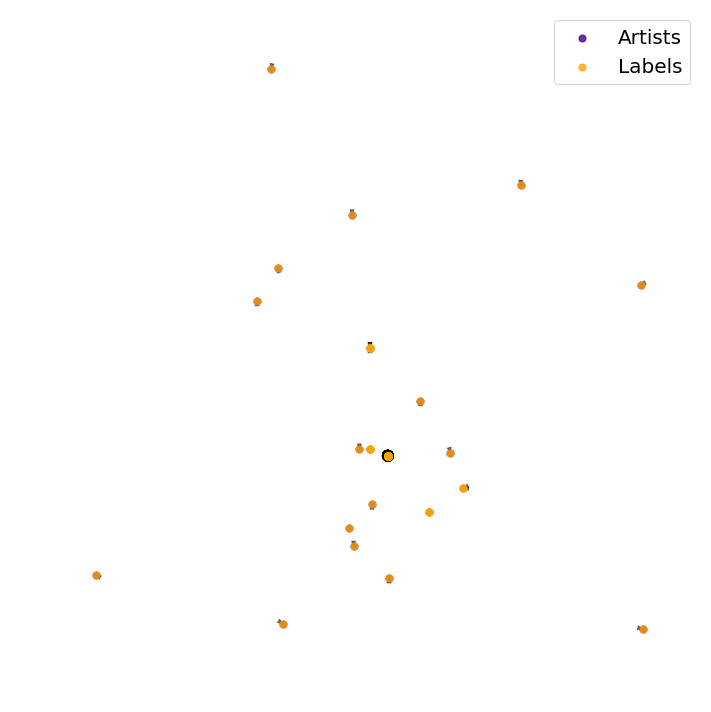

In [72]:
plt.figure(figsize=(10, 10))
pos = nx.spectral_layout(G_artist_to_label)
nx.draw_networkx_nodes(G_artist_to_label, pos,
                       nodelist=list(np.unique(graph2[:c, 0])),
                       node_color='indigo',
                       node_size=50,
                       alpha=0.8,
                       label="Artists")
nx.draw_networkx_nodes(G_artist_to_label,pos,
                       nodelist=list(np.unique(graph2[:c, 1])),
                       node_color='orange',
                       node_size=50,
                       alpha=0.8,
                       label="Labels")
nx.draw_networkx_edges(G_artist_to_label ,pos,width=1.0, alpha=0.5, edge_color="black")
plt.axis("off")
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("tlen_3.png")
plt.show()
#nx.draw(G_artist_to_label, pos=nx.spectral_layout(G_artist_to_label))

### Плотность графа

In [15]:
E_all = graph_artist_to_label.shape[0]
V_artists = np.unique(graph_artist_to_label[:, 0]).shape[0]
V_labels = np.unique(graph_artist_to_label[:, 1]).shape[0]

In [16]:
E_all, V_artists, V_labels

(233286, 168268, 18421)

In [17]:
def density(V, E):
    return 2 * E / (V * (V - 1))

In [18]:
density(V_artists, E_all), density(V_labels, E_all), density(V_artists + V_labels, E_all)

(1.6478519399780808e-05, 0.0013750416206400888, 1.3387008519296977e-05)

### Диаметр графа

In [19]:
G.add_edges_from(graph_full)

In [20]:
nx.algorithms.distance_measures.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected

In [138]:
nx.algorithms.distance_measures.center(G)

NetworkXError: Found infinite path length because the graph is not connected

### With bipartite graph

In [136]:
G_small = nx.Graph()
c = 1000
G_small.add_nodes_from(graph2[:c, 0], bipartite=0)
G_small.add_nodes_from(graph2[:c, 1], bipartite=1)
G_small.add_edges_from(graph2[:c])

In [137]:
nx.is_connected(G_small)

False

### Density and degrees

In [23]:
from networkx.algorithms import bipartite

In [24]:
bipartite.density(G_small, list(graph2[:c, 0]))

-2.1460609052084897e-05

In [25]:
bipartite.density(G_small, list(graph2[:c, 1]))

-2.1460609052084897e-05

In [26]:
deg_A, deg_L = bipartite.degrees(G_small, list(graph2[:c, 0]))

In [27]:
sum(list(dict(deg_A).values())) / len(deg_A)

12.664133326095218

In [28]:
sum(list(dict(deg_L).values())) / len(deg_L)

1.3863955119214586

In [29]:
(sum(list(dict(deg_A).values())) + sum(list(dict(deg_L).values()))) / (len(deg_L) + len(deg_A))

2.499193846450514

### Degree distribution

In [32]:
def plotDegreeDistribution(degrees, name):
    degs = defaultdict(int)
    for i in degrees:
        degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    total = sum(y)
    y = y / total
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'bo')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['Degree'], fontsize=20)
    plt.xlabel('$Degree$', fontsize = 20)
    plt.ylabel('$Frequency$', fontsize = 20)
    plt.title('Degree Distribution of {}'.format(name), fontsize = 20)
    plt.savefig("{}_distr.png".format(name))
    plt.show()

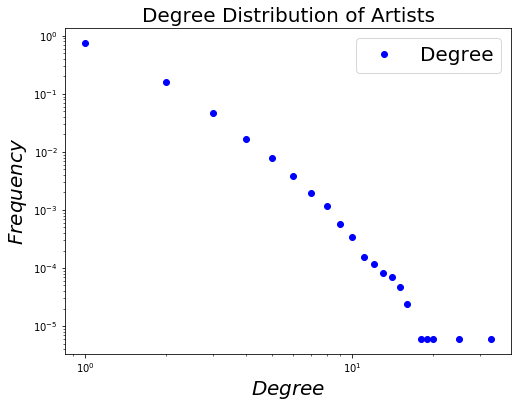

In [33]:
plotDegreeDistribution(dict(deg_L).values(), "Artists")

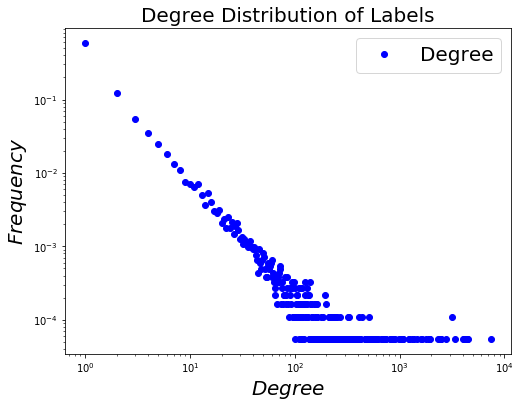

In [34]:
plotDegreeDistribution(dict(deg_A).values(), "Labels")

In [176]:
dict_of_cliques = nx.cliques_containing_node(G_small,nodes=None,cliques=None)
dict_of_cliques

{1: [[1, 54]],
 2: [[2, 55], [2, 56], [2, 57], [2, 58], [2, 59], [2, 60], [2, 61], [2, 62]],
 3: [[3, 63]],
 4: [[4, 64], [4, 65]],
 5: [[5, 66], [5, 67], [5, 68]],
 6: [[6, 69]],
 7: [[7, 72], [7, 57], [7, 70], [7, 71]],
 8: [[8, 64],
  [8, 73],
  [8, 74],
  [8, 75],
  [8, 76],
  [8, 77],
  [8, 78],
  [8, 79],
  [8, 80],
  [8, 81],
  [8, 82],
  [8, 56]],
 9: [[9, 83], [9, 84]],
 10: [[10, 88], [10, 85], [10, 86], [10, 87]],
 11: [[11, 89], [11, 90], [11, 57]],
 12: [[12, 91]],
 13: [[13, 74]],
 14: [[14, 74]],
 15: [[15, 61], [15, 71]],
 16: [[16, 71]],
 17: [[17, 92], [17, 93], [17, 94], [17, 95]],
 18: [[18, 55]],
 19: [[19, 55]],
 20: [[20, 96], [20, 57], [20, 97]],
 21: [[21, 98], [21, 61], [21, 71]],
 22: [[22, 99], [22, 100], [22, 101], [22, 102], [22, 103], [22, 73]],
 23: [[23, 104]],
 24: [[24, 105]],
 25: [[25, 106], [25, 107], [25, 108], [25, 109]],
 26: [[26, 82], [26, 110], [26, 111]],
 27: [[27, 112], [27, 73], [27, 99]],
 28: [[28, 100], [28, 74], [28, 113], [28, 114], 

In [138]:
cc = list(nx.connected_components(G_small))

In [139]:
len(cc)

21

#### Get max connected component:

In [140]:
cc.sort(key=len, reverse=True)

In [141]:
H = G_small.subgraph(cc[0])

In [142]:
RB_art = {n for n, d in H.nodes(data=True) if d['bipartite']==0}
RB_rec = {n for n, d in H.nodes(data=True) if d['bipartite']==1}

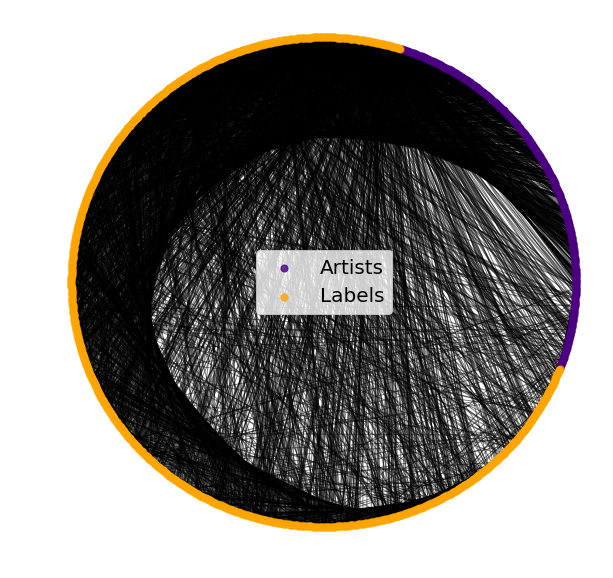

In [123]:
plt.figure(figsize=(10, 10))
pos = nx.shell_layout(H)
nx.draw_networkx_nodes(H, pos,
                       nodelist=RB_art,
                       node_color='indigo',
                       node_size=50,
                       alpha=0.8,
                       label="Artists")
nx.draw_networkx_nodes(H,pos,
                       nodelist=RB_rec,
                       node_color='orange',
                       node_size=50,
                       alpha=0.8,
                       label="Labels")
nx.draw_networkx_edges(H ,pos,width=1.0, alpha=0.5, edge_color="black")
plt.axis("off")
plt.legend(fontsize=20)
plt.savefig("big_visualize_1.png")
plt.show()
#nx.draw(G_artist_to_label, pos=nx.spectral_layout(G_artist_to_label))

In [40]:
bipartite.density(H, RB_art)

0.0001268194410174786

In [41]:
bipartite.density(H, RB_rec)

0.0001268194410174786

In [42]:
nx.algorithms.distance_measures.diameter(H)

KeyboardInterrupt: 

In [202]:
nx.algorithms.distance_measures.center(H)

[74]

In [49]:
def plotSizeDistribution(sizes):
    degs = defaultdict(int)
    for i in sizes:
        degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    total = sum(y)
    y = y / total
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'bo')
    plt.xscale('log')
    #plt.yscale('log')
    plt.legend(['Connected component size'], fontsize=20)
    plt.xlabel('$Size, log$', fontsize = 20)
    plt.ylabel('$Frequency$', fontsize = 20)
    plt.title('Connected component Distribution', fontsize = 20)
    plt.savefig("con_comp_size.png")
    plt.show()

In [50]:
sizes = [len(c) for c in cc]

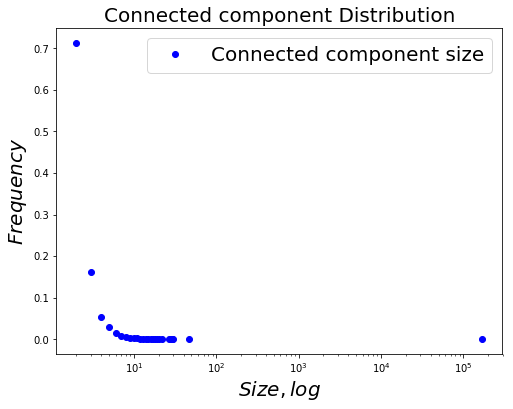

In [51]:
plotSizeDistribution(sizes)

In [52]:
max(sizes)

169463

In [53]:
max(sizes) / (V_artists + V_labels)

0.9077288967212851

In [74]:
V_artists, V_labels, E_all

(168268, 18421, 233286)

### Construct new social graph

In [143]:
S = nx.Graph()
S.add_nodes_from(RB_art)
#S.add_nodes_from(RB_rec, bipartite=1)

In [223]:
RB_art

{2,
 4,
 5,
 7,
 8,
 9,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 52,
 53}

In [144]:
list(H.neighbors(list(RB_art)[0]))

[267, 268, 269, 270, 271, 272, 273, 274]

In [145]:
l_RB_art = list(RB_art)

In [146]:
for i in range(len(l_RB_art)):
    for j in range(i + 1, len(l_RB_art)):
        v1 = l_RB_art[i]
        v2 = l_RB_art[j]
        nodes_i = set(list(H.neighbors(l_RB_art[i])))
        nodes_j = set(list(H.neighbors(l_RB_art[j])))
        if len(nodes_i & nodes_j) >= 2:
            S.add_edge(v1, v2)

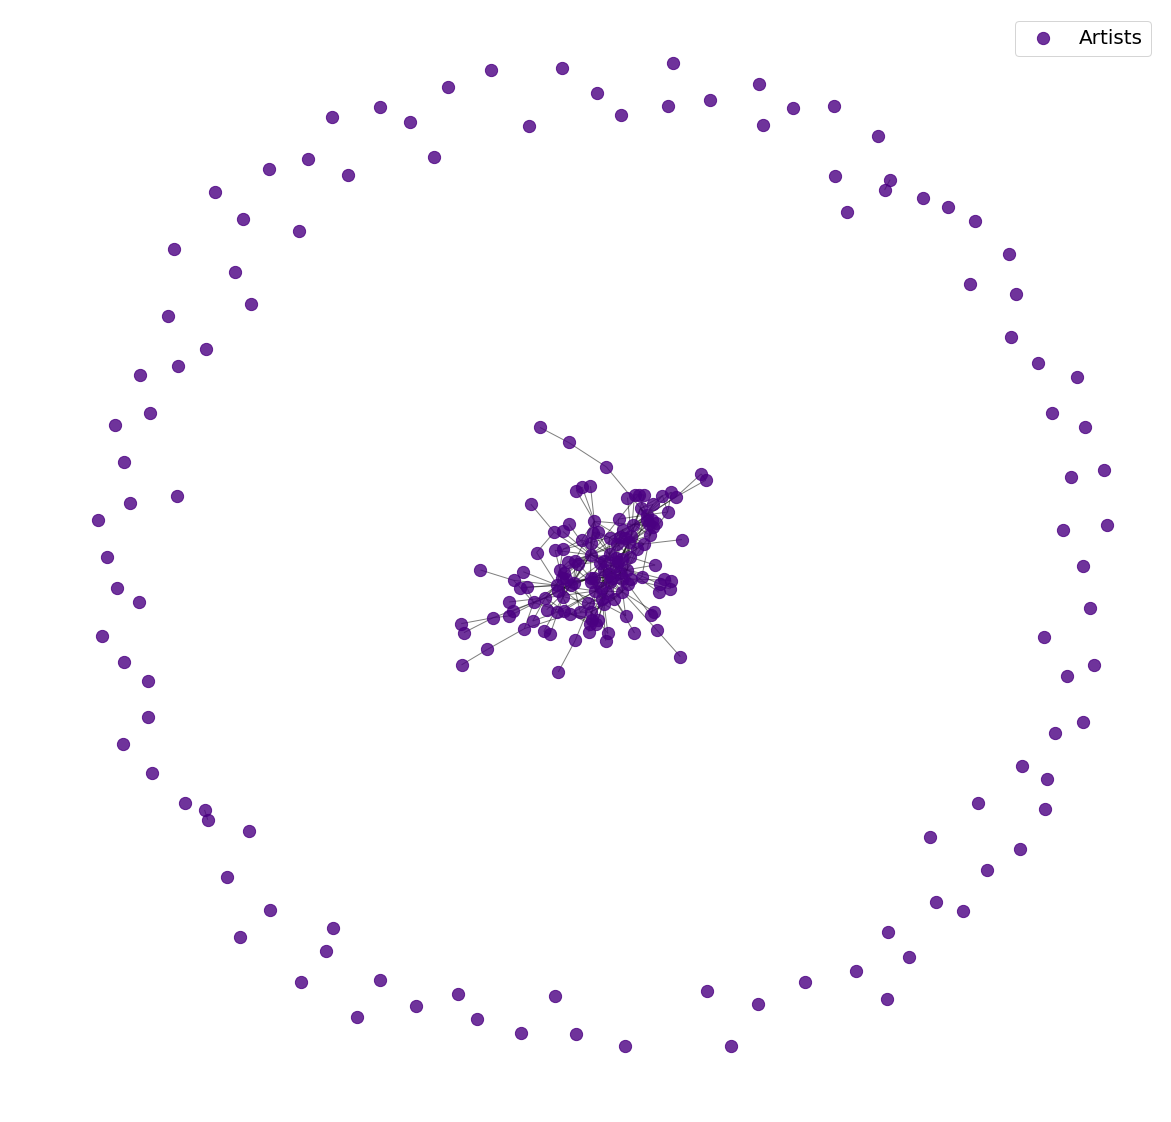

In [147]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(S)
nx.draw_networkx_nodes(S, pos,
                       nodelist=S.nodes(),
                       node_color='indigo',
                       node_size=150,
                       alpha=0.8,
                       label="Artists")
nx.draw_networkx_edges(S ,pos,width=1.0, alpha=0.5, edge_color="black")
plt.axis("off")
plt.legend(fontsize=20)
plt.savefig("small_visualize_spring.png")
plt.show()
#nx.draw(G_artist_to_label, pos=nx.spectral_layout(G_artist_to_label))

In [148]:
cc = list(nx.connected_components(S))
cc.sort(key=len, reverse=True)
H = S.subgraph(cc[0])

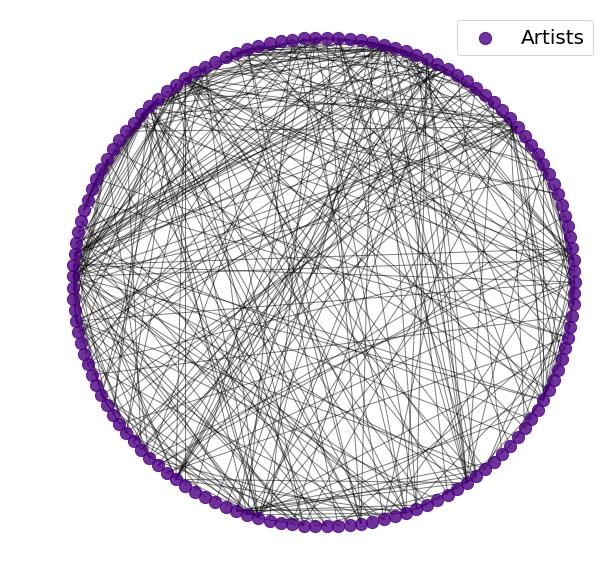

In [149]:
plt.figure(figsize=(10, 10))
pos = nx.shell_layout(H)
nx.draw_networkx_nodes(H, pos,
                       nodelist=H.nodes(),
                       node_color='indigo',
                       node_size=150,
                       alpha=0.8,
                       label="Artists")
nx.draw_networkx_edges(H ,pos,width=1.0, alpha=0.5, edge_color="black")
plt.axis("off")
plt.legend(fontsize=20)
plt.savefig("small_visualize_shell_1.png")
plt.show()
#nx.draw(G_artist_to_label, pos=nx.spectral_layout(G_artist_to_label))

In [150]:
nx.algorithms.distance_measures.diameter(H)

10

In [132]:
nx.algorithms.distance_measures.center(S)

NetworkXError: Found infinite path length because the graph is not connected

In [151]:
sum(dict(H.degree()).values()) / len(H.nodes())

5.7226277372262775

In [152]:
density(len(H.edges()), len(H.nodes()))

0.0017876715903752806

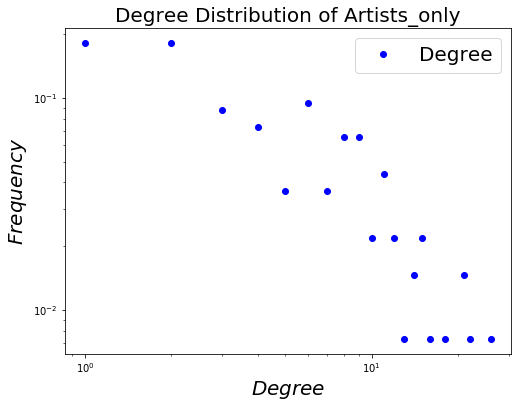

In [153]:
plotDegreeDistribution(dict(H.degree()).values(), "Artists_only")

In [165]:
spl = nx.all_pairs_shortest_path_length(H)

In [166]:
V_cnt = len(H.nodes())
V_cnt, len(H.edges())

(137, 392)

In [167]:
all_lengs = []
for x in spl:
    all_lengs += x[1].values()

In [169]:
sum(all_lengs) / 2 / (V_cnt * (V_cnt - 1) / 2)

3.4191713181623014